In [1]:
import pickle 
import numpy as np
import pandas as pd
import pathlib 
import os, sys
import torch 
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
from torch.nn import functional as F


SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
%matplotlib widget

In [2]:
with open('/home/local/kitadam/ENR_Sven/moxie_revisited/data/processed/pedestal_profiles_ML_READY_ak_09022022.pickle', 'rb') as file:

    full_dict = pickle.load(file)

    train_X, train_y, train_mask, train_radii, train_ids = full_dict['train_dict']['padded']['profiles'],full_dict['train_dict']['padded']['controls'], full_dict['train_dict']['padded']['masks'], full_dict['train_dict']['padded']['radii'] , full_dict['train_dict']['padded']['pulse_time_ids'] 

    val_X, val_y, val_mask, val_radii, val_ids = full_dict['val_dict']['padded']['profiles'],full_dict['val_dict']['padded']['controls'], full_dict['val_dict']['padded']['masks'], full_dict['val_dict']['padded']['radii'], full_dict['val_dict']['padded']['pulse_time_ids']

    test_X, test_y, test_mask, test_radii, test_ids = full_dict['test_dict']['padded']['profiles'],full_dict['test_dict']['padded']['controls'], full_dict['test_dict']['padded']['masks'], full_dict['test_dict']['padded']['radii'], full_dict['test_dict']['padded']['pulse_time_ids']

train_pulse_order = [int(x.split('/')[0]) for x in train_ids]
train_pulses = list(set(train_pulse_order))
machine_param_order = ['Q95', 'RGEO', 'CR0', 'VOLM', 'TRIU', 'TRIL', 'ELON', 'POHM', 'IPLA', 'BVAC', 'NBI', 'ICRH', 'ELER']
jet_pedestal_database = pd.read_csv('/home/local/kitadam/ENR_Sven/moxie_revisited/data/raw/jet-pedestal-database.csv')
jet_pedestal_database = jet_pedestal_database[(jet_pedestal_database['FLAG:HRTSdatavalidated'] > 0) & (jet_pedestal_database['FLAG:DEUTERIUM'] == 1)]
relevant_columns = ['shot', 'nepedheight10^19(m^-3)','Tepedheight(keV)', 'B(T)','Ip(MA)',   'R(m)', 'a(m)','gasflowrateofmainspecies10^22(e/s)',  'P_TOT=PNBI+Pohm+PICRH-Pshi(MW)', 'P_ICRH(MW)', 'P_NBI(MW)','plasmavolume(m^3)', 'averagetriangularity', 'divertorconfiguration', 'FLAG:Seeding', 'FLAG:Kicks',
 'FLAG:RMP',
 'FLAG:pellets',]
FLAGS = [x for x in jet_pedestal_database.columns.to_list() if 'FLAG' in x]

Emperical limit: 

$$n_G \propto \frac{I_P}{\pi a^2}$$ 

with units: $I_P$ [MA], $a^2$ [m], $n_G$ [$10^{20}$m$^{-3}$]

In [42]:
plt.close()

IP = np.linspace(0, 5e6)
a = 0.95

def make_greenwald(c): 
    return lambda x: (c*(x*1e-6) / (np.pi*a**2))*1e20
ng = make_greenwald(1.0)

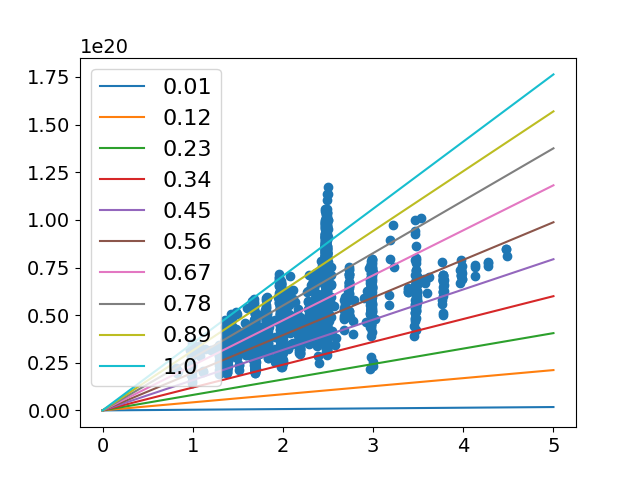

In [45]:
plt.close()
for const in np.linspace(0.01, 1.0, 10): 
    ng = make_greenwald(const)
    plt.plot(IP*1e-6, ng(IP), label=f'{const}')
    # if const == 0.01: 
    #     print(ng(IP))

plt.scatter(jet_pedestal_database['Ip(MA)'], jet_pedestal_database['nepedheight10^19(m^-3)']*1e19)
plt.legend()
plt.show()

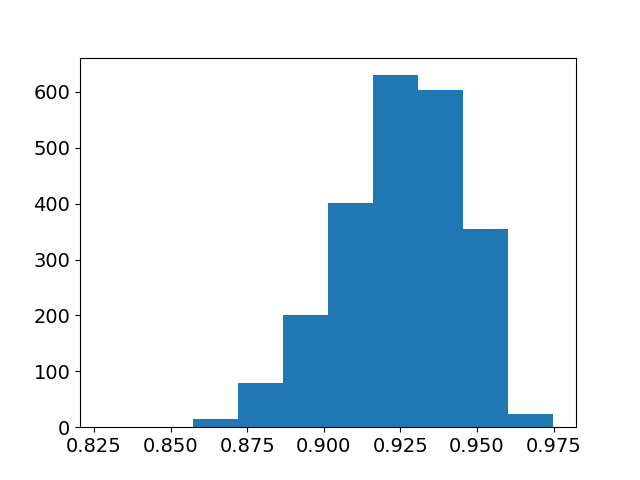

In [36]:
plt.close()

plt.hist(jet_pedestal_database['a(m)'])
plt.show()